In [6]:
!pip install kagglehub


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-shows


In [7]:
from google.colab import files
files.upload()  # Sube aquí el archivo kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"molmos2","key":"f2218f986ca73d6231ddb679b1cc828b"}'}

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
import kagglehub

path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/netflix-shows


In [12]:
import pandas as pd

df = pd.read_csv(f"{path}/netflix_titles.csv")
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


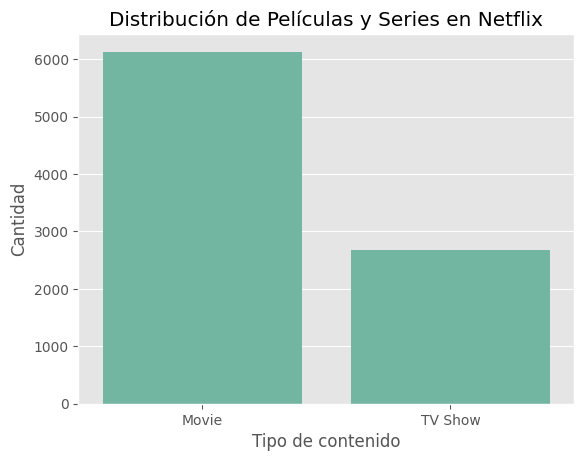

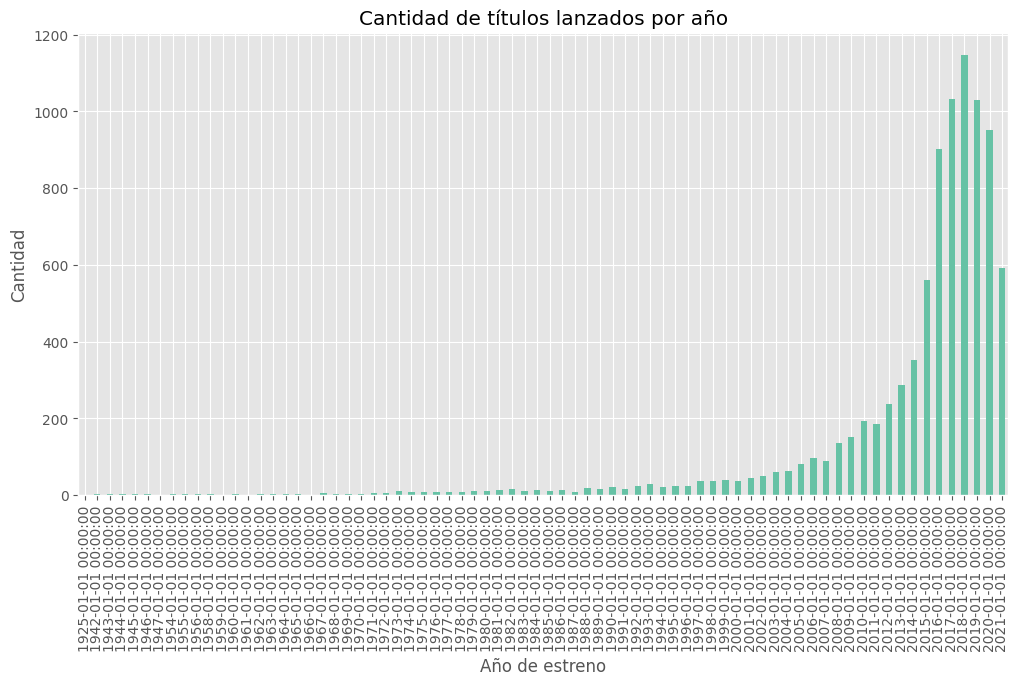

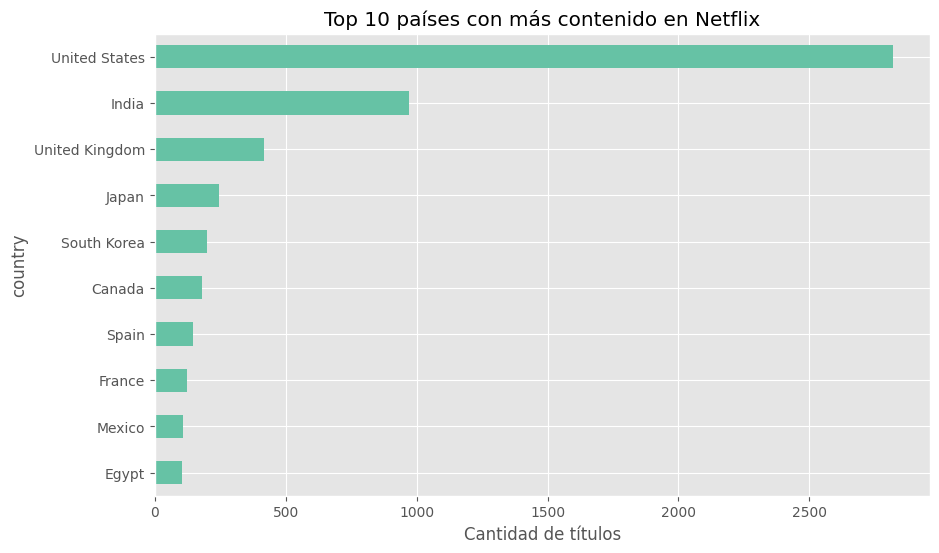

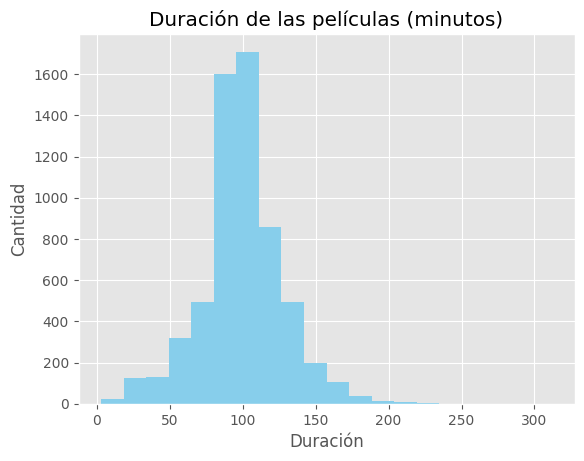

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("Set2")

# Películas vs Series
sns.countplot(x='type', data=df)
plt.title('Distribución de Películas y Series en Netflix')
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.show()

# Producciones por año
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Cantidad de títulos lanzados por año')
plt.xlabel('Año de estreno')
plt.ylabel('Cantidad')
plt.show()

# Países con más producciones
top_paises = df['country'].value_counts().head(10)
top_paises.plot(kind='barh', figsize=(10,6))
plt.title('Top 10 países con más contenido en Netflix')
plt.xlabel('Cantidad de títulos')
plt.gca().invert_yaxis()
plt.show()

# Duración media de películas
peliculas = df[df['type'] == 'Movie']
duraciones = peliculas['duration'].str.extract('(\d+)').dropna().astype(int)
plt.hist(duraciones[0], bins=20, color='skyblue')
plt.title('Duración de las películas (minutos)')
plt.xlabel('Duración')
plt.ylabel('Cantidad')
plt.show()